### Workshop 2 - Fish Tank - Daniel Kim ###
 

In [3]:
#importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# setting given constants in the question 

#Input parameters
We = 100 #w 
WGlass = 10 #lb 

#Geometry
L = 0.51 #m
W = 0.25 #m
H = 0.30 #m 

#Fixed temperatures 
#https://www.makeitfrom.com/material-properties/Toughened-Tempered-Soda-Lime-Glass
T_initial = 15 #C
T_inf = 21 #C
T_set = 27 #C

#Thermal properties
rho_glass = 2520 #kg/m^3
c_glass = 720 #J/kg/K
rho_H2O = 1000 #kg/m^3
c_H2O = 4200 #J/kg/K

#Heat Transfer Coefficients
U_surface = 13 #W/m^2/K
U_side = 8.50 #W/m^2/K
U_floor = 3 #W/m^2/K

#### Derived parameters, capitances, and resistances ####

Thermal resistance formula is as follows : 
$ R = \frac{L}{KA} = \frac{1}{UA}$ where <br>
L = Material conductivity($Wm^{-1}k^{-1}$)<br>
K = Material thickness($m$)<br>
U = HT coefficient ($Wm^{-2}k^{-1}$)<br>
A = Material cross-sectional area($m^2$)<br>

In [4]:
#Parameters
M_glass = WGlass * 0.453592 #kg
A_glass = 2 * (W * H) + 2 * (L * H) +  (L * H) #m^2 (#2 x side(W*H) + 2 x front(L*H) + 1 bottom(W*H))
t_glass = M_glass / (rho_glass * A_glass) #m 
M_H2O = L * W * H * rho_H2O #kg
Asurf = L * W #m^2
Afloor = Asurf #m^2
A_side = 2 * H * L + 2 * H * W #m^2

#Capitances
C_glass = M_glass * c_glass #J/K
C_H2O = M_H2O * c_H2O #J/K
C_lump = C_glass + C_H2O #J/K

#### Modelling the system as thermal circuit #### 
<img src="Slide4.jpg" alt="Overview of a thermal circuit model" width="500"/>



In [9]:
#Resistance 
R_surface = 1 / (Afloor + A_side)*(U_surface) #K/W
R_side = 1 / (A_side)*(U_side) #K/W
R_floor = 1 / (Afloor)*(U_floor) #K/W
#Uitlizing the parallel resistance equation to find the total resistance
R_equiv = 1 / (1/R_surface + 1/R_side + 1/R_floor) #K/W

#time constant 
tau = C_lump * R_equiv #s

#Steady state temperature 
T_ss = T_inf + (We * R_equiv) #C

#Target 
theta_target = (T_set - T_ss)/(T_initial - T_ss) #C

In [10]:
print(tau, T_ss, theta_target)

1162262.7563655034 730.0605749486654 0.9832182049739472


In [18]:
# Results 
time_to_target = -tau * np.log(theta_target) #s
print("Time to target in seconds is: ", time_to_target)
time_to_target_hours = time_to_target / 3600 #hours
print("Time to target in hours is: ", time_to_target_hours)
We_target = We * theta_target #W
print("Power required to maintain target temperature is: ", We_target, "W")

Time to target in seconds is:  19670.372987848965
Time to target in hours is:  5.463992496624712
Power required to maintain target temperature is:  98.32182049739473 W


#### Simulations ####

In [46]:
import pandas as pd
import numpy as np

df = pd.DataFrame(0, index=range(0, 21), columns=[f'Column_{i+1}' for i in range(7)])
df = df.rename(columns={'Column_1': 'time', 'Column_3': 'Theta', 'Column_4': 'Qtop (W)',
                        'Column_5': 'Qside (W)', 'Column_6': 'Qfloor (W)', 'Column_7': 'Qnet (W)', 'Column_2': 'T(C)'})
dt = time_to_target_hours / 20  
df['time'] = np.arange(0, time_to_target_hours + dt, dt)[:21] 
dtheta = theta_target / 20
df['Theta'] = np.arange(0, theta_target + dtheta, dtheta)[:21] 
df['T(C)'] = T_initial + df['Theta'] * (T_ss - T_initial)
df['Qtop (W)'] = (R_surface/R_equiv) * We * (df['T(C)'] - T_inf)
df['Qside (W)'] = (R_side/R_equiv) * We * (df['T(C)'] - T_inf)
df['Qfloor (W)'] = (R_floor/R_equiv) * We * (df['T(C)'] - T_inf)
df['Qnet (W)'] = df['Qtop (W)'] + df['Qside (W)'] + df['Qfloor (W)']
# Displaying the DataFrame
display(df)

,time,T(C),Theta,Qtop (W),Qside (W),Qfloor (W),Qnet (W)
0,0.000000,15.000000,0.000000,-1885.256313,-1577.327935,-1991.035401,-5453.619649
1,0.273200,50.153029,0.049161,9160.155250,7663.981107,9674.118712,26498.255068
2,0.546399,85.306057,0.098322,20205.566813,16905.290148,21339.272824,58450.129785
3,0.819599,120.459086,0.147483,31250.978376,26146.599190,33004.426936,90402.004503
4,1.092798,155.612115,0.196644,42296.389939,35387.908232,44669.581049,122353.879220
5,1.365998,190.765144,0.245805,53341.801502,44629.217274,56334.735161,154305.753937
6,1.639198,225.918172,0.294965,64387.213065,53870.526316,67999.889273,186257.628654
7,1.912397,261.071201,0.344126,75432.624628,63111.835358,79665.043386,218209.503372
8,2.185597,296.224230,0.393287,86478.036191,72353.144399,91330.197498,250161.378089
9,2.458797,331.377259,0.442448,97523.447754,81594.453441,102995.351610,282113.252806


The values are wildely off. I believe it's because of the difference between w and wdot. I didn't see the point of the doing graph, but I have included it nonetheless below. 
I will try to fix this problem by coming into the office hours. 

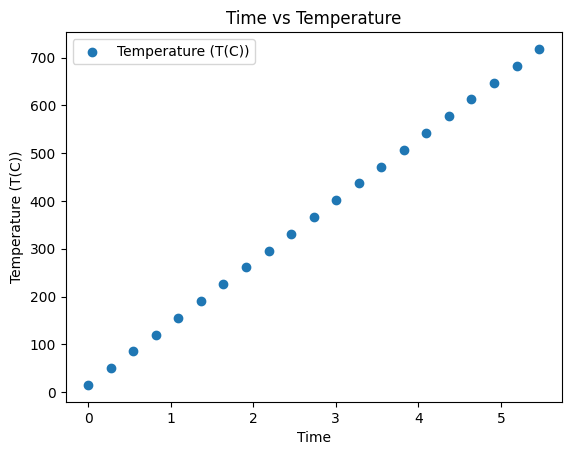

In [50]:
plt.scatter(df['time'], df['T(C)'], label='Temperature (T(C))')
plt.xlabel('Time')
plt.ylabel('Temperature (T(C))')
plt.title('Time vs Temperature')
plt.legend()
plt.show()

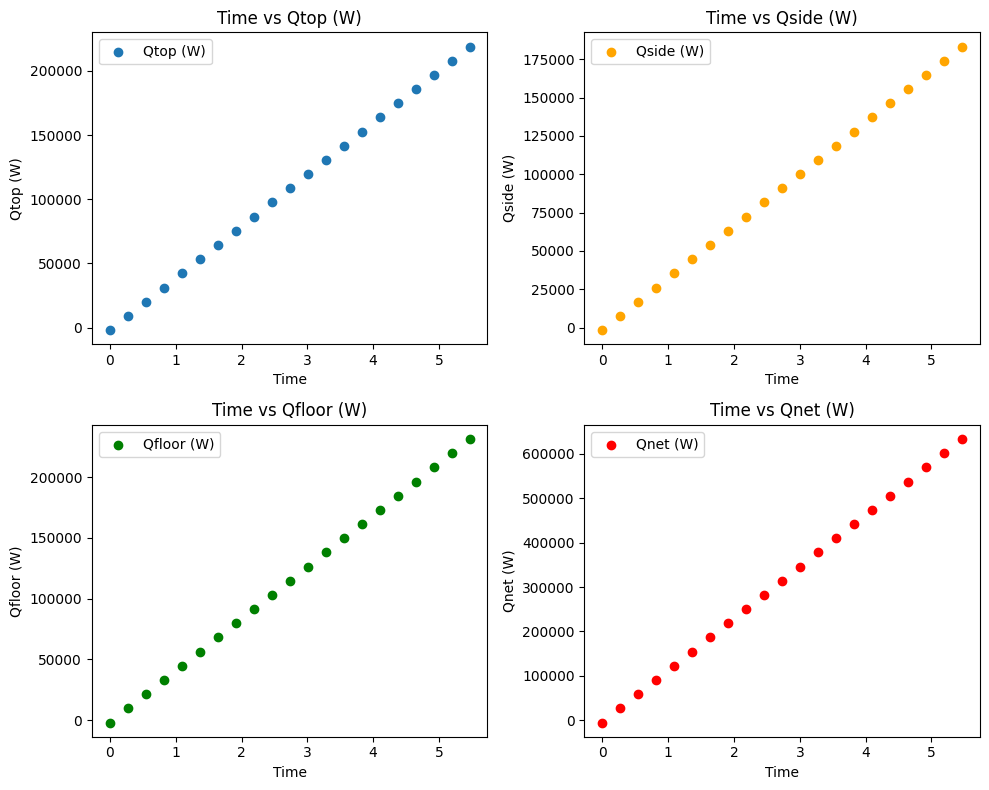

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(df['time'], df['Qtop (W)'], label='Qtop (W)')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Qtop (W)')
axes[0, 0].set_title('Time vs Qtop (W)')
axes[0, 0].legend()

axes[0, 1].scatter(df['time'], df['Qside (W)'], label='Qside (W)', color='orange')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Qside (W)')
axes[0, 1].set_title('Time vs Qside (W)')
axes[0, 1].legend()

axes[1, 0].scatter(df['time'], df['Qfloor (W)'], label='Qfloor (W)', color='green')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Qfloor (W)')
axes[1, 0].set_title('Time vs Qfloor (W)')
axes[1, 0].legend()

axes[1, 1].scatter(df['time'], df['Qnet (W)'], label='Qnet (W)', color='red')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Qnet (W)')
axes[1, 1].set_title('Time vs Qnet (W)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
